## Preamble 

In [1]:
import sys
sys.path.extend(["../../src/core", "../../src/utils"])
from draw import Draw
from io_manager import Load
from analyse import Analyse
from pyutils.pyplot import Plot
from pyutils.pyselect import Select
from pyutils.pyvector import Vector
from pyutils.pyprint import Print

import awkward as ak
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

## Load data

In [2]:
ana_label = "dev_CRY_mix2BB_onspill-LH_aw_noCRV"
data = Load(in_path = f"../../output/results/{ana_label}").load_pkl() 
events = data["events"]

[Load] ✅ Initialised with out_path=../../output/results/dev_CRY_mix2BB_onspill-LH_aw_noCRV
[Load] ✅ Successfully loaded results from ../../output/results/dev_CRY_mix2BB_onspill-LH_aw_noCRV/results.pkl


In [3]:
display(data["cut_flow"])
# printer.print_n_events(data["events"])

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,2160537,100.000,100.000,No selection applied
1,has_trk_front,Preselect,2126506,98.425,98.425,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,2054807,95.106,96.628,Electron track fits
3,one_reco_electron,Preselect,1479584,68.482,72.006,One reco electron / event
4,is_downstream,Preselect,825787,38.221,55.812,Downstream tracks (p_z > 0 at tracker entrance)
5,is_truth_electron,Preselect,258271,11.954,31.276,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,182914,8.466,70.823,Track fit quality > 0.2
7,within_t0,Tracker,149420,6.916,81.689,t0 at tracker entrance (640 < t_0 < 1650 ns)
8,within_t0err,Tracker,140902,6.522,94.299,Track fit t0 uncertainty (t0err < 0.9 ns)
9,has_hits,Tracker,139272,6.446,98.843,>20 active tracker hits


In [4]:
printer = Print()
printer.print_n_events(events, 1)

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 1 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 55113
evt.event: 77350
crv.crvcoincs.time: [1.06e+03]
crv.crvcoincs.nHits: [18]
crv.crvcoincs.pos.fCoordinates.fZ: [-6.84e+03]
mom_mag: [[87.9, 88, 88, 88.1, 88.2, 87.6, 87.7, 87.4, 88.2, 88.2, 88], ..., [87.2, ...]]
dev.at_trk_front: [[False, False, False, False, False, ..., False, False, False, False], ...]
dev.has_trk_front: [True, True, True, True]
dev.is_reco_electron: [True, False, False, False]
dev.one_reco_electron: [True, True, True, True]
dev.one_reco_electron_per_event: True
dev.is_downstream: [True, False, True, False]
dev.has_trk_parent_electron: [True, True, True, True]
dev.good_trkqual: [True, False, False, False]
dev.within_t0: [True, True, True, True]
dev.within_t0err: [True, False, True, False]
dev.has_hits: [True, False, True, False]
dev.within_d0: [Tr

In [5]:
# # test["trk"] = ak.flatttest["trk"][is_electron]
# test["trkfit"] = ak.flatten(test["trkfit"], axis=-1)

In [6]:
# at_trk_front = selector.select_surface(test["trkfit"], "TT_Front")
# test["trkfit"] = test["trkfit"][at_trk_front]

In [7]:
# print(unvetoed)

In [8]:
events.fields

['evt', 'crv', 'mom_mag', 'dev', 'trk', 'trkfit', 'trkmc']

In [9]:
printer.print_n_events(events, 1)

[pyprint] ⭐️ Printing 1 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 55113
evt.event: 77350
crv.crvcoincs.time: [1.06e+03]
crv.crvcoincs.nHits: [18]
crv.crvcoincs.pos.fCoordinates.fZ: [-6.84e+03]
mom_mag: [[87.9, 88, 88, 88.1, 88.2, 87.6, 87.7, 87.4, 88.2, 88.2, 88], ..., [87.2, ...]]
dev.at_trk_front: [[False, False, False, False, False, ..., False, False, False, False], ...]
dev.has_trk_front: [True, True, True, True]
dev.is_reco_electron: [True, False, False, False]
dev.one_reco_electron: [True, True, True, True]
dev.one_reco_electron_per_event: True
dev.is_downstream: [True, False, True, False]
dev.has_trk_parent_electron: [True, True, True, True]
dev.good_trkqual: [True, False, False, False]
dev.within_t0: [True, True, True, True]
dev.within_t0err: [True, False, True, False]
dev.has_hits: [True, False, True, False]
dev.within_d0: [True, True, True, True]
dev.pitch_angle: [[0.918, 0.807, 0.657, 0.658, 0

In [10]:
# all my masks
printer.print_n_events(events["dev"], 1)

[pyprint] ⭐️ Printing 1 event(s)...

-------------------------------------------------------------------------------------
at_trk_front: [[False, False, False, False, False, ..., False, False, False, False], ...]
has_trk_front: [True, True, True, True]
is_reco_electron: [True, False, False, False]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
is_downstream: [True, False, True, False]
has_trk_parent_electron: [True, True, True, True]
good_trkqual: [True, False, False, False]
within_t0: [True, True, True, True]
within_t0err: [True, False, True, False]
has_hits: [True, False, True, False]
within_d0: [True, True, True, True]
pitch_angle: [[0.918, 0.807, 0.657, 0.658, 0.66, ..., 0.951, 0.997, 0.324, 0.66, 0.657], ...]
within_pitch_angle_lo: [True, False, True, False]
within_pitch_angle_hi: [True, True, True, True]
within_lhr_max_lo: [True, True, True, True]
within_lhr_max_hi: [True, True, True, True]
dT: [45.9, 44.7, 41.6, 47.7]
veto_condition: [True, True, T

## Sanity check 

Does the number of minimum dT values, including None values, align with the number of events? 

In [11]:
def check_counts(arr, field="min_dT"):

    n_events = len(arr)
    n_min_dT = len(ak.flatten(arr["dev"][field], axis=None))
    n_min_dT_none = ak.sum(ak.is_none(arr["dev"][field], axis=-1), axis=None)
    
    print(
        f"Field:                    {field}\n" 
        f"Total events:           {n_events:>8,}\n"
        f"Min dT (non-None):      {n_min_dT:>8,}\n"
        f"Min dT (None):          {n_min_dT_none:>8,}\n"
        f"Sum:                    {n_min_dT + n_min_dT_none:>8,}\n"
        f"{'✅ All accounted for\n' if n_events == n_min_dT + n_min_dT_none else '❌ Mismatch!\n'}"
    )

# check_counts()
check_counts(events, field="min_dT_vetoed")
check_counts(events[events["dev"]["vetoed"]], field="min_dT_vetoed")
check_counts(events[events["dev"]["unvetoed"]], field="min_dT_unvetoed")
# check_counts()

Field:                    min_dT_vetoed
Total events:             16,981
Min dT (non-None):        16,891
Min dT (None):                90
Sum:                      16,981
✅ All accounted for

Field:                    min_dT_vetoed
Total events:             16,891
Min dT (non-None):        16,891
Min dT (None):                 0
Sum:                      16,891
✅ All accounted for

Field:                    min_dT_unvetoed
Total events:                 90
Min dT (non-None):            66
Min dT (None):                24
Sum:                          90
✅ All accounted for



## Plot 

In [12]:
plotter = Plot()
out_path = Path("../../output/images/comp/dT")
out_path.mkdir(parents=True, exist_ok=True)

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


### dT with no momentum cut 

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


/tmp/ipykernel_30589/1859038095.py:57: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[2].set_ylim(0, ax[2].get_ylim()[1] * (1+0.5))


	Wrote ../../output/images/comp/dT/h1_1x3_dT.png


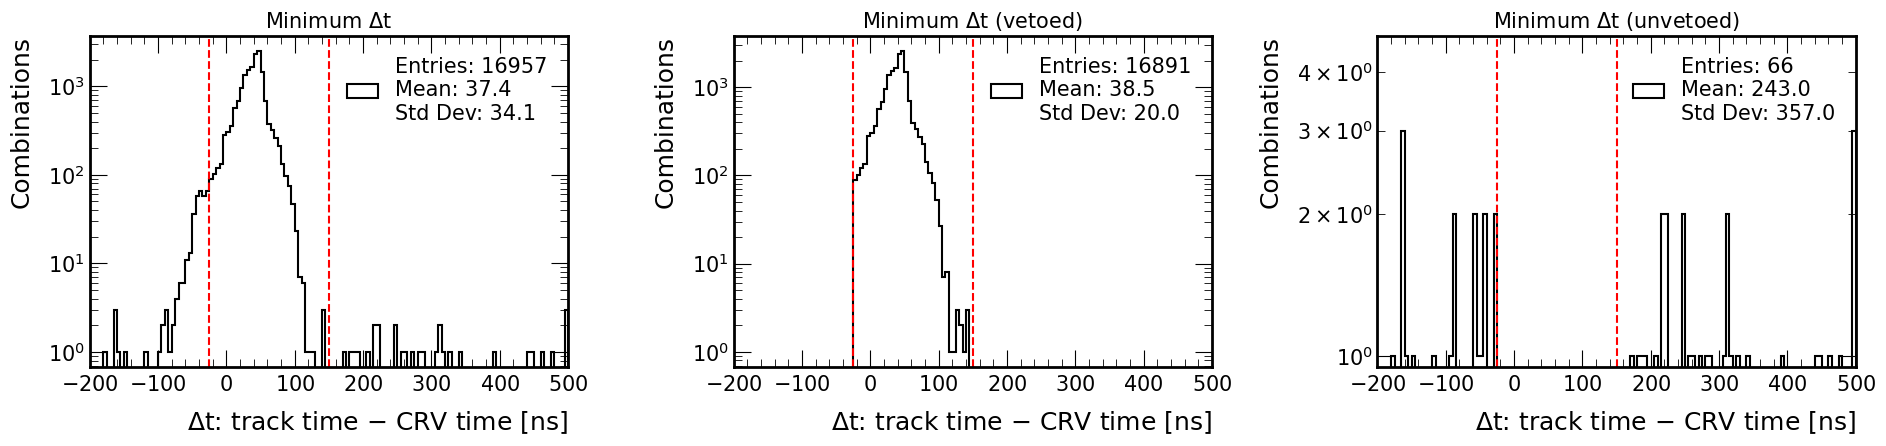

In [13]:
plotter = Plot()

fig, ax = plt.subplots(1, 3, figsize=(3*6.4, 1*4.8))

# Arrays
min_dT = ak.drop_none(events["dev"]["min_dT"], axis=-1)
min_dT_vetoed = events["dev"]["min_dT_vetoed"][events["dev"]["vetoed"]]
min_dT_unvetoed = events["dev"]["min_dT_unvetoed"][events["dev"]["unvetoed"]]

plotter.plot_1D( 
    ak.flatten(min_dT, axis=None),
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"Minimum $\Delta t$ ",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=False,
    col="black",
    ax=ax[0],
    log_y=True
)

plotter.plot_1D( 
    ak.flatten(min_dT_vetoed, axis=None),
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"Minimum $\Delta t$ (vetoed)",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=False,
    col="black",
    ax=ax[1],
    log_y=True
)

plotter.plot_1D( 
    ak.flatten(min_dT_unvetoed, axis=None),
    nbins=140,
    xmin=-200, 
    xmax=500,
    title=r"Minimum $\Delta t$ (unvetoed)",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=False,
    col="black",
    ax=ax[2],
    log_y=True
)

for i_ax, subplot in enumerate(ax):
    
    subplot.axvline(-25, linestyle="--", color="red")
    subplot.axvline(150, linestyle="--", color="red")

ax[2].set_ylim(0, ax[2].get_ylim()[1] * (1+0.5))

plt.tight_layout()
out_file_name = f"{out_path}/h1_1x3_dT.png"
plt.savefig(out_file_name, dpi=300)
print(f"\tWrote {out_file_name}")
plt.show()

>**Note:** Everything adds up if you include the None values

[pyselect] ✅ Returning mask for trksegs with sid = 0
[pyvector] ⭐️ Initialised Vector with verbosity = 1
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Got 'mom' magnitude


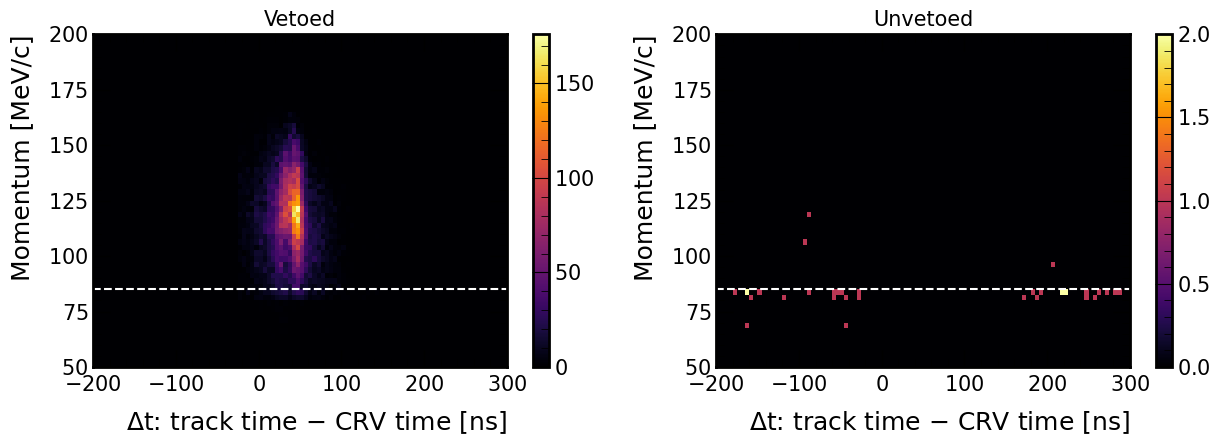

Wrote ../../output/images/comp/dT/h2_1x2_mom_vs_dt.png


In [14]:
selector = Select()
at_trk_ent = selector.select_surface(events["trkfit"], "TT_Front")
trkfit = events["trkfit"][at_trk_ent]
mom_mag = Vector().get_mag(trkfit["trksegs"], "mom")
events["dev"]["mom_mag"] = mom_mag

fig, ax = plt.subplots(1,2,figsize=(2*6.4, 4.8))
    
plotter.plot_2D( 
    x=ak.flatten(min_dT_vetoed, axis=None),
    y=ak.flatten(mom_mag[events["dev"]["vetoed"]], axis=None),
    nbins_x=100,
    xmin=-200, 
    xmax=300,
    nbins_y=60,
    ymin=50, 
    ymax=200,
    show=False,
    ax=ax[0],
    title="Vetoed",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Momentum [MeV/c]",
    log_z=False,
)

plotter.plot_2D( 
    x=ak.flatten(min_dT_unvetoed, axis=None),
    y=ak.flatten(mom_mag[events["dev"]["unvetoed"]], axis=None),
    nbins_x=100,
    xmin=-200, 
    xmax=300,
    nbins_y=60,
    ymin=50, 
    ymax=200,
    show=False,
    ax=ax[1],
    title="Unvetoed",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Momentum [MeV/c]",
    log_z=False,
)


plt.tight_layout()
ax[0].axhline(85, linestyle="--", color="white")
ax[1].axhline(85, linestyle="--", color="white")
out_file_name = f"{out_path}/h2_1x2_mom_vs_dt.png"
plt.savefig(out_file_name, dpi=300)
plt.show()
print(f"Wrote {out_file_name}")


## 1D momentum distributions 

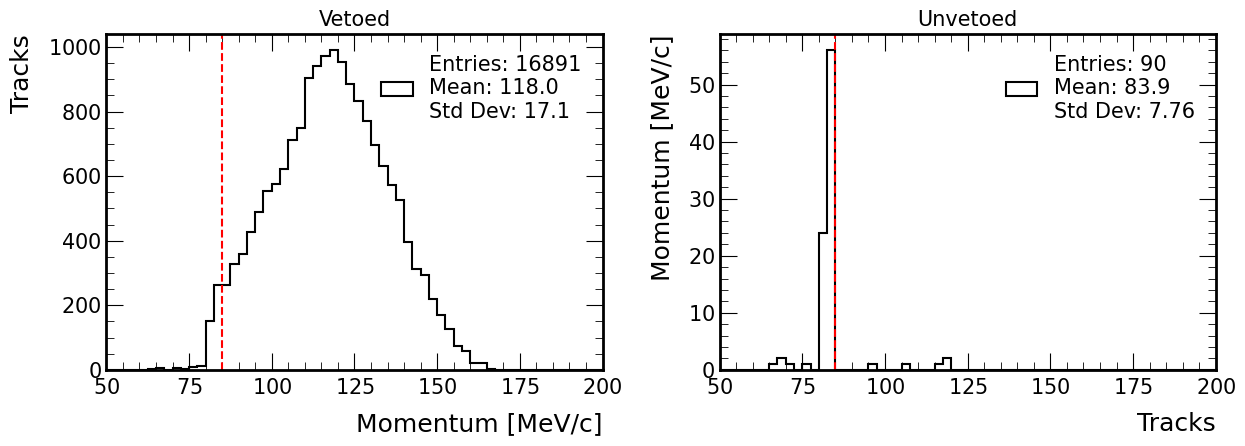

Wrote ../../output/images/comp/dT/h1_1x2_mom.png


In [15]:
fig, ax = plt.subplots(1,2,figsize=(2*6.4, 4.8))
    
plotter.plot_1D( 
    ak.flatten(mom_mag[events["dev"]["vetoed"]], axis=None),
    nbins=60,
    xmin=50, 
    xmax=200,
    show=False,
    ax=ax[0],
    title="Vetoed",
    ylabel=r"Tracks",
    xlabel=r"Momentum [MeV/c]",
    # log_z=True,
    # show=True
)

plotter.plot_1D( 

    ak.flatten(mom_mag[events["dev"]["unvetoed"]], axis=None),
    nbins=60,
    xmin=50, 
    xmax=200,
    show=False,
    ax=ax[1],
    title="Unvetoed",
    xlabel=r"Tracks",
    ylabel=r"Momentum [MeV/c]",
    # log_z=True,
    # show=True
)


plt.tight_layout()
ax[0].axvline(85, linestyle="--", color="red")
ax[1].axvline(85, linestyle="--", color="red")
out_file_name = f"{out_path}/h1_1x2_mom.png"
plt.savefig(out_file_name, dpi=300)
plt.show()
print(f"Wrote {out_file_name}")


### dT with momentum cut 

Use within_wide_window + select

In [16]:
mom_condition = ak.any((events["dev"]["within_wide_win"] & events["dev"]["select"]), axis=-1)
# print(mom_condition)
selected_events = events[mom_condition]

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


/tmp/ipykernel_30589/2435715433.py:62: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[2].set_ylim(0, ax[2].get_ylim()[1] * (1+0.5))


	Wrote ../../output/images/comp/dT/h1_1x3_dT_wide_win.png


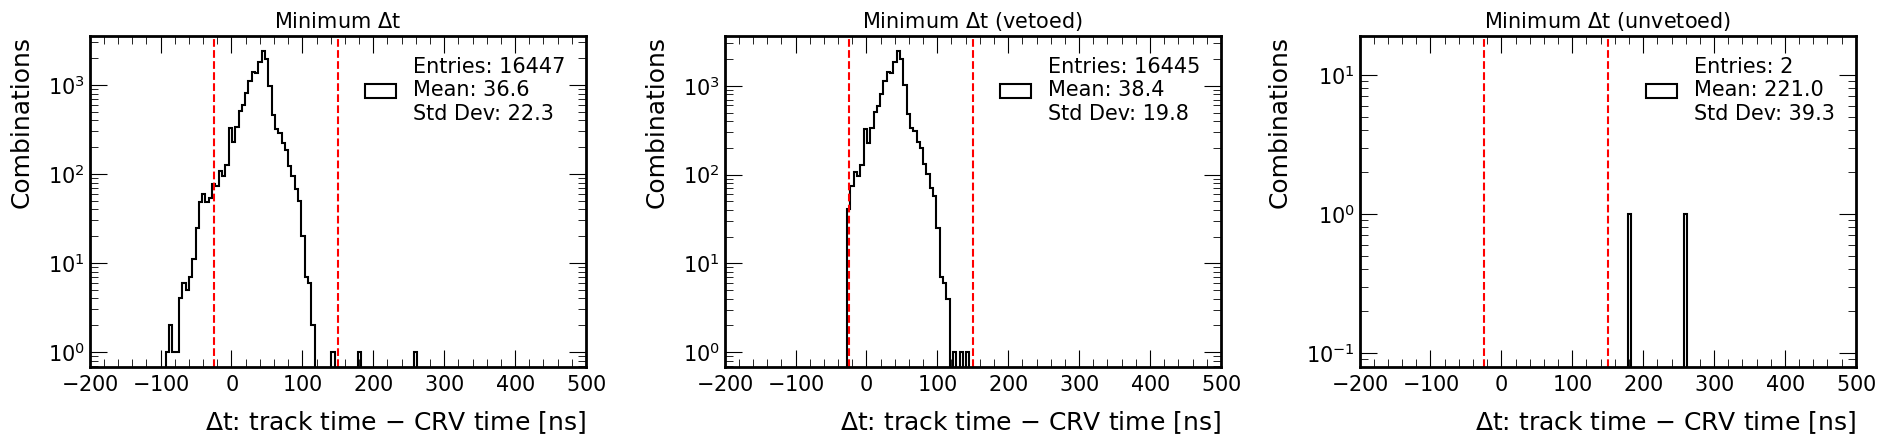

In [17]:
plotter = Plot()

fig, ax = plt.subplots(1, 3, figsize=(3*6.4, 1*4.8))

# Arrays
min_dT = selected_events["dev"]["min_dT"]
min_dT_vetoed = selected_events["dev"]["min_dT_vetoed"][selected_events["dev"]["vetoed"]]
min_dT_unvetoed = selected_events["dev"]["min_dT_unvetoed"][selected_events["dev"]["unvetoed"]]

plotter.plot_1D( 
    ak.flatten(min_dT, axis=None),
    nbins=150,
    xmin=-200, 
    xmax=500,
    title=r"Minimum $\Delta t$ ",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=False,
    col="black",
    ax=ax[0],
    log_y=True
)

plotter.plot_1D( 
    ak.flatten(min_dT_vetoed, axis=None),
    nbins=150,
    xmin=-200, 
    xmax=500,
    title=r"Minimum $\Delta t$ (vetoed)",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=False,
    col="black",
    ax=ax[1],
    log_y=True
)

plotter.plot_1D( 
    ak.flatten(min_dT_unvetoed, axis=None),
    nbins=150,
    xmin=-200, 
    xmax=500,
    title=r"Minimum $\Delta t$ (unvetoed)",
    xlabel=r"$\Delta t$: track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=False,
    col="black",
    ax=ax[2],
    log_y=True
)

# for j_ax, row in enumerate(ax):
#     for i_ax, subplot in enumerate(row):
#         subplot.set_ylim(0, subplot.get_ylim()[1] * (1+0.7))
for i_ax, subplot in enumerate(ax):
    
    subplot.axvline(-25, linestyle="--", color="red")
    subplot.axvline(150, linestyle="--", color="red")


# ax[0,2].set_ylim(0, ax[0,2].get_ylim()[1] * (1+0.75))
ax[2].set_ylim(0, ax[2].get_ylim()[1] * (1+0.5))

plt.tight_layout()
out_file_name = f"{out_path}/h1_1x3_dT_wide_win.png"
plt.savefig(out_file_name, dpi=300)
print(f"\tWrote {out_file_name}")
plt.show()

## ~80 MeV/c bump?

In [18]:
mom_condition = ak.flatten(ak.flatten((mom_mag < 85) & (mom_mag > 80), axis=-1), axis=-1)
bump_events = events[mom_condition & events["dev"]["unvetoed"]]

at_trk_ent = selector.select_surface(bump_events["trkfit"], "TT_Front")
trkfit = bump_events["trkfit"][at_trk_ent]
mom_mag = Vector().get_mag(bump_events["trkfit"]["trksegs"], "mom") 

[pyselect] ✅ Returning mask for trksegs with sid = 0
[pyvector] ⭐️ Initialised Vector with verbosity = 1
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Got 'mom' magnitude


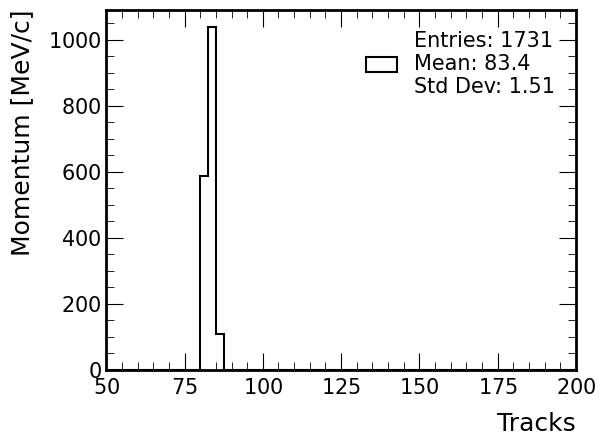

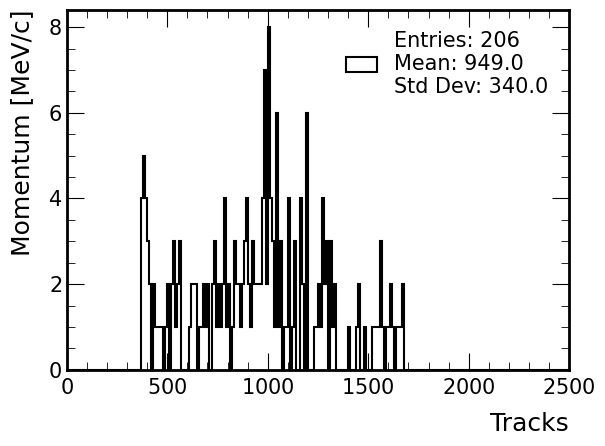

In [27]:



plotter.plot_1D( 
    ak.flatten(mom_mag, axis=None),
    nbins=60,
    xmin=50, 
    xmax=200,
    show=True,
    xlabel=r"Tracks",
    ylabel=r"Momentum [MeV/c]"
)

# Need to think of some physics parameters here 
# I guess it's just pileup, but what does that mean? 
# Couldit be 

plotter.plot_1D( 
    ak.flatten(bump_events["crv"]["crvcoincs.time"], axis=None),
    nbins=250,
    xmin=0, 
    xmax=2500,
    show=True,
    xlabel=r"Tracks",
    ylabel=r"Momentum [MeV/c]"
)

# z-position 
# something else? 
# 

# plotter.plot_1D( 
#     ak.flatten(bump_events["crv"]["crvcoincs.pos"], axis=None),
#     nbins=250,
#     xmin=0, 
#     xmax=2500,
#     show=True,
#     xlabel=r"Tracks",
#     ylabel=r"Momentum [MeV/c]"
# )

# plotter.plot_1D( 
#     ak.flatten(bump, axis=None),
#     nbins=60,
#     xmin=50, 
#     xmax=200,
#     show=True,
#     xlabel=r"Tracks",
#     ylabel=r"Momentum [MeV/c]"
# )


# plotter.plot_1D( 
#     ak.flatten(bump_events["trk, axis=None),
#     nbins=60,
#     xmin=50, 
#     xmax=200,
#     show=True,
#     xlabel=r"Tracks",
#     ylabel=r"Momentum [MeV/c]"
# )


# printer.print_n_events(bump_events)
# Do they pass quality? 

# bump_events = events[events["dev"]["unvetoed"]]

## Print unvetoed dTs: sanity check 

In [20]:
unvetoed_selected_events = selected_events[selected_events["dev"]["unvetoed"]]
print(len(unvetoed_selected_events), "(we expect 5)")

5 (we expect 5)


In [21]:
printer.print_n_events(unvetoed_selected_events["dev"], len(unvetoed_selected_events))

[pyprint] ⭐️ Printing 5 event(s)...

-------------------------------------------------------------------------------------
at_trk_front: [[False, False, False, False, True, False, False, False, False], ..., [...]]
has_trk_front: [True, True, True, True]
is_reco_electron: [True, False, False, False]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
is_downstream: [True, False, True, False]
has_trk_parent_electron: [True, True, True, True]
good_trkqual: [True, True, True, False]
within_t0: [True, True, True, True]
within_t0err: [True, False, True, False]
has_hits: [True, True, True, True]
within_d0: [True, True, True, True]
pitch_angle: [[0.935, 0.942, 0.588, 1.01, 0.999, 1.03, 0.358, 0.59, 0.587], ..., [...]]
within_pitch_angle_lo: [True, False, True, False]
within_pitch_angle_hi: [True, True, True, True]
within_lhr_max_lo: [True, True, True, True]
within_lhr_max_hi: [True, True, True, True]
dT: []
veto_condition: []
vetoed: False
unvetoed: True
dT_vetoed: []